# Heatmap Demo

Demonstrates matplotly's heatmap support for `imshow`, `pcolormesh`, and seaborn-style heatmaps.

**Controls available:**
- Colormap selection (viridis, plasma, coolwarm, RdBu, etc. + reversed variants)
- vmin/vmax range
- Normalization (linear, log, symlog, centered)
- Interpolation (nearest, bilinear, bicubic — imshow only)
- Aspect ratio (equal, auto — imshow only)
- Alpha transparency
- Cell annotations (on/off, format, font size, auto-contrast color)
- Grid lines (on/off, width, color)
- Colorbar (show/hide, location, shrink, pad, label, font sizes)

In [1]:
%matplotlib widget

In [2]:
import matplotlib
matplotlib.use('module://ipympl.backend_nbagg')
import matplotlib.pyplot as plt
import numpy as np
from matplotly import matplotly

## 1. Basic Heatmap (imshow)

In [3]:
np.random.seed(42)
data = np.random.rand(8, 10)

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(data, cmap='viridis')
fig.colorbar(im, ax=ax, label='Value')
ax.set_title('Basic Heatmap')
ax.set_xlabel('Column')
ax.set_ylabel('Row')
matplotly(fig)

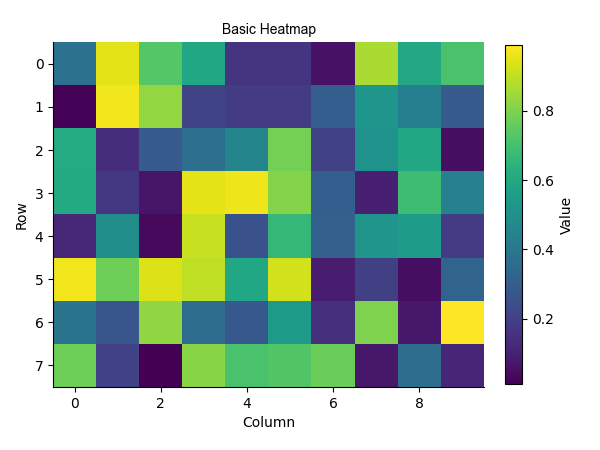

In [4]:
np.random.seed(42)
data = np.random.rand(8, 10)

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(data, cmap='viridis')
fig.colorbar(im, ax=ax, label='Value')
ax.set_title('Basic Heatmap')
ax.set_xlabel('Column')
ax.set_ylabel('Row')

# Generated by matplotly v4

# Heatmap (imshow)
_im = ax.images[0]
_im.set_cmap('viridis')
_im.set_clim(0.01, 0.99)
_im.set_interpolation('antialiased')
ax.set_aspect(1.0)

# Colorbar
if getattr(ax.images[0], 'colorbar', None) is not None:
    ax.images[0].colorbar.remove()
_cbar = fig.colorbar(ax.images[0], ax=ax, shrink=0.85, pad=0.04)
_cbar.set_label('Value', fontsize=10.0)

# Labels
ax.set_title('Basic Heatmap')
ax.set_xlabel('Column')
ax.set_ylabel('Row')

# Limits
ax.set_xlim(-0.5, 9.5)
ax.set_ylim(7.5, -0.5)

# Fonts
ax.title.set_fontsize(10.0)
ax.title.set_fontfamily('Arial')
ax.xaxis.label.set_fontsize(10.0)
ax.yaxis.label.set_fontsize(10.0)
ax.tick_params(labelsize=10.0)
ax.tick_params(direction='out', length=3.5, width=0.8)

# Spines
ax.spines['top'].set_visible(False)
ax.spines['top'].set_linewidth(0.8)
ax.spines['right'].set_visible(False)
ax.spines['right'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)
ax.spines['left'].set_linewidth(0.8)

# Layout
fig.set_size_inches(6.0, 4.5)
fig.tight_layout()

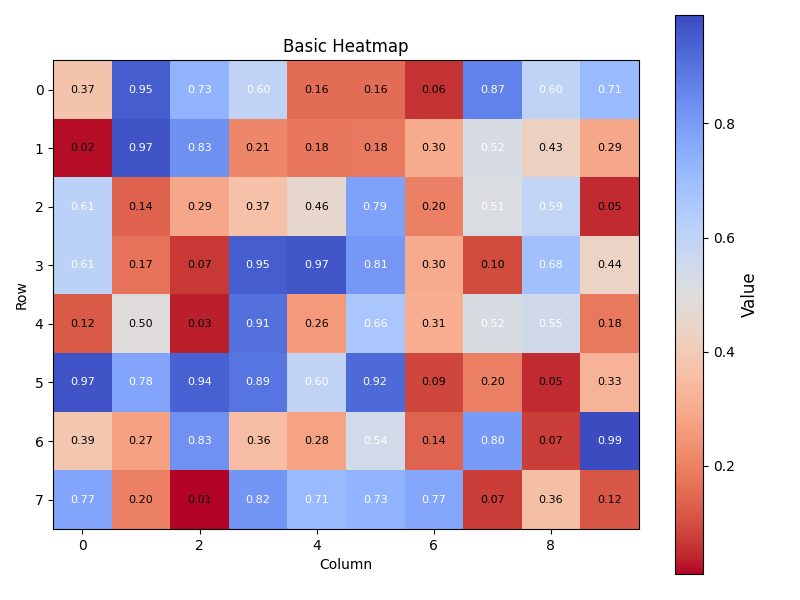

In [6]:
np.random.seed(42)
data = np.random.rand(8, 10)

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(data, cmap='viridis')
fig.colorbar(im, ax=ax, label='Value')
ax.set_title('Basic Heatmap')
ax.set_xlabel('Column')
ax.set_ylabel('Row')

# Generated by matplotly v4

# Heatmap (imshow)
_im = ax.images[0]
_im.set_cmap('coolwarm_r')
_im.set_clim(0.01, 0.99)
_im.set_interpolation('antialiased')
ax.set_aspect(1.0)

# Annotations
_data = _im.get_array()
if hasattr(_data, 'reshape'):
    _data = _data.reshape(8, 10)
_vmin, _vmax = _im.get_clim()
_vmid = (_vmin + _vmax) / 2.0
for _i in range(8):
    for _j in range(10):
        _val = _data[_i, _j]
        _c = 'white' if _val > _vmid else 'black'
        ax.text(_j, _i, format(_val, '.2f'), ha='center', va='center', fontsize=8.0, color=_c)

# Colorbar
if getattr(ax.images[0], 'colorbar', None) is not None:
    ax.images[0].colorbar.remove()
_cbar = fig.colorbar(ax.images[0], ax=ax)
_cbar.set_label('Value', fontsize=12.0)

# Labels
ax.set_title('Basic Heatmap')
ax.set_xlabel('Column')
ax.set_ylabel('Row')

# Limits
ax.set_xlim(-0.5, 9.5)
ax.set_ylim(7.5, -0.5)

# Fonts
ax.title.set_fontsize(12.0)
ax.title.set_fontfamily('sans-serif')
ax.xaxis.label.set_fontsize(10.0)
ax.yaxis.label.set_fontsize(10.0)
ax.tick_params(labelsize=10.0)
ax.tick_params(direction='out', length=3.5, width=0.8)

# Spines
ax.spines['top'].set_linewidth(0.8)
ax.spines['right'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)
ax.spines['left'].set_linewidth(0.8)

# Layout
fig.set_size_inches(8.0, 6.0)
fig.tight_layout()

## 2. Correlation Matrix (annotated, diverging cmap)

In [7]:
np.random.seed(123)
n_vars = 6
labels = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon', 'Zeta']
X = np.random.randn(100, n_vars)
# Introduce correlations
X[:, 1] = X[:, 0] * 0.8 + X[:, 1] * 0.2
X[:, 3] = -X[:, 2] * 0.7 + X[:, 3] * 0.3
corr = np.corrcoef(X.T)

fig, ax = plt.subplots(figsize=(7, 6))
im = ax.imshow(corr, cmap='RdBu_r', vmin=-1, vmax=1)
fig.colorbar(im, ax=ax, shrink=0.8, label='Correlation')

# Add annotations
for i in range(n_vars):
    for j in range(n_vars):
        color = 'white' if abs(corr[i, j]) > 0.5 else 'black'
        ax.text(j, i, f'{corr[i, j]:.2f}', ha='center', va='center',
                fontsize=10, color=color)

ax.set_xticks(range(n_vars))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticks(range(n_vars))
ax.set_yticklabels(labels)
ax.set_title('Correlation Matrix')
matplotly(fig)

## 3. Monthly Data Heatmap (custom tick labels)

In [5]:
np.random.seed(7)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = [str(y) for y in range(2019, 2025)]

# Simulate temperature-like seasonal data
data = np.zeros((len(years), len(months)))
for i in range(len(years)):
    for j in range(len(months)):
        seasonal = 15 * np.sin(2 * np.pi * (j - 3) / 12)
        data[i, j] = 20 + seasonal + np.random.randn() * 2 + i * 0.3

fig, ax = plt.subplots(figsize=(10, 5))
im = ax.imshow(data, cmap='YlOrRd', aspect='auto')
fig.colorbar(im, ax=ax, label='Temperature (C)')

# Annotations
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        ax.text(j, i, f'{data[i, j]:.1f}', ha='center', va='center',
                fontsize=8, color='black' if data[i, j] < 25 else 'white')

ax.set_xticks(range(len(months)))
ax.set_xticklabels(months)
ax.set_yticks(range(len(years)))
ax.set_yticklabels(years)
ax.set_title('Monthly Temperatures')
matplotly(fig)

In [6]:
np.random.seed(7)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = [str(y) for y in range(2019, 2025)]

# Simulate temperature-like seasonal data
data = np.zeros((len(years), len(months)))
for i in range(len(years)):
    for j in range(len(months)):
        seasonal = 15 * np.sin(2 * np.pi * (j - 3) / 12)
        data[i, j] = 20 + seasonal + np.random.randn() * 2 + i * 0.3

fig, ax = plt.subplots(figsize=(10, 5))
im = ax.imshow(data, cmap='YlOrRd', aspect='auto')
fig.colorbar(im, ax=ax, label='Temperature (C)')

# Annotations
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        ax.text(j, i, f'{data[i, j]:.1f}', ha='center', va='center',
                fontsize=8, color='black' if data[i, j] < 25 else 'white')

ax.set_xticks(range(len(months)))
ax.set_xticklabels(months)
ax.set_yticks(range(len(years)))
ax.set_yticklabels(years)
ax.set_title('Monthly Temperatures')

# Generated by matplotly v4

# Heatmap (imshow)
_im = ax.images[0]
_im.set_cmap('YlOrRd')
_im.set_clim(3.49, 37.04)
_im.set_interpolation('antialiased')
ax.set_aspect('auto')

# Annotations
_data = _im.get_array()
if hasattr(_data, 'reshape'):
    _data = _data.reshape(6, 12)
_vmin, _vmax = _im.get_clim()
_vmid = (_vmin + _vmax) / 2.0
for _i in range(6):
    for _j in range(12):
        _val = _data[_i, _j]
        _c = 'white' if _val > _vmid else 'black'
        ax.text(_j, _i, format(_val, '.2f'), ha='center', va='center', fontsize=8.0, color=_c)

# Colorbar
if getattr(ax.images[0], 'colorbar', None) is not None:
    ax.images[0].colorbar.remove()
_cbar = fig.colorbar(ax.images[0], ax=ax)
_cbar.set_label('Temperature (C)', fontsize=12.0)

# Labels
ax.set_title('Monthly Temperatures')

# Limits
ax.set_xlim(-0.5, 11.5)
ax.set_ylim(5.5, -0.5)

# Fonts
ax.title.set_fontsize(12.0)
ax.title.set_fontfamily('sans-serif')
ax.xaxis.label.set_fontsize(10.0)
ax.yaxis.label.set_fontsize(10.0)
ax.tick_params(labelsize=10.0)
ax.tick_params(direction='out', length=3.5, width=0.8)

# Spines
ax.spines['top'].set_linewidth(0.8)
ax.spines['right'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)
ax.spines['left'].set_linewidth(0.8)

# Layout
fig.set_size_inches(10.0, 5.0)
fig.tight_layout()

## 4. Log-Scaled Heatmap

In [ ]:
from matplotlib.colors import LogNorm

np.random.seed(55)
data = np.random.lognormal(mean=2, sigma=2, size=(10, 12))
data = np.clip(data, 1, 10000)

fig, ax = plt.subplots(figsize=(9, 6))
im = ax.imshow(data, cmap='plasma', norm=LogNorm(vmin=1, vmax=10000))
fig.colorbar(im, ax=ax, label='Counts (log scale)')
ax.set_title('Log-Scaled Heatmap')
ax.set_xlabel('Feature')
ax.set_ylabel('Sample')
matplotly(fig)

## 5. pcolormesh with Non-Uniform Grid

In [5]:
np.random.seed(99)
# Non-uniform grid coordinates
x = np.array([0, 1, 3, 6, 10, 15])
y = np.array([0, 2, 5, 9, 14])
X, Y = np.meshgrid(x, y)
Z = np.random.rand(len(y) - 1, len(x) - 1) * 100

fig, ax = plt.subplots(figsize=(8, 6))
pcm = ax.pcolormesh(X, Y, Z, cmap='cividis', shading='flat')
fig.colorbar(pcm, ax=ax, label='Intensity')
ax.set_title('pcolormesh (Non-Uniform Grid)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
matplotly(fig)

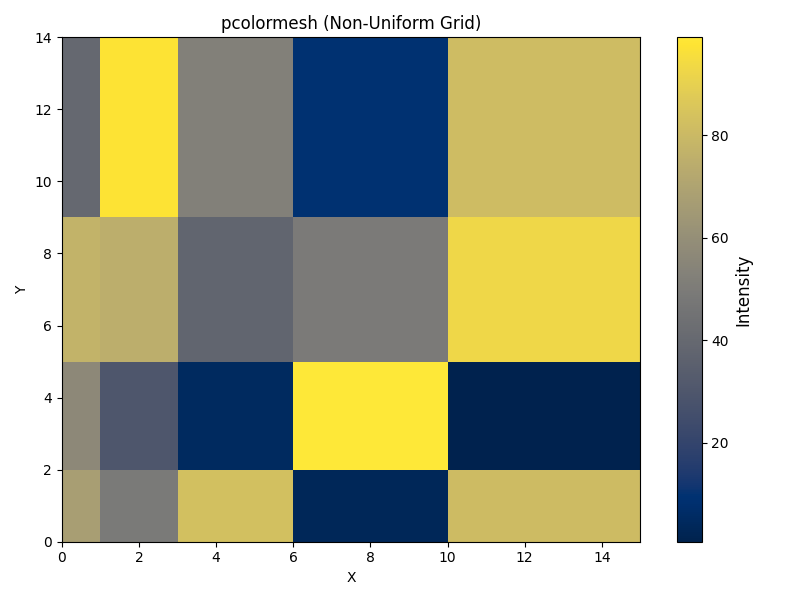

In [6]:
np.random.seed(99)
# Non-uniform grid coordinates
x = np.array([0, 1, 3, 6, 10, 15])
y = np.array([0, 2, 5, 9, 14])
X, Y = np.meshgrid(x, y)
Z = np.random.rand(len(y) - 1, len(x) - 1) * 100

fig, ax = plt.subplots(figsize=(8, 6))
pcm = ax.pcolormesh(X, Y, Z, cmap='cividis', shading='flat')
fig.colorbar(pcm, ax=ax, label='Intensity')
ax.set_title('pcolormesh (Non-Uniform Grid)')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Generated by matplotly v4

# Heatmap (pcolormesh)
_qm = ax.collections[0]
_qm.set_cmap('cividis')
_qm.set_clim(0.68, 99.06)

# Colorbar
_cbar = getattr(ax.collections[0], 'colorbar', None)
if _cbar is None:
    _cbar = fig.colorbar(ax.collections[0], ax=ax)
else:
    _cbar.update_normal(ax.collections[0])
_cbar.set_label('Intensity', fontsize=12.0)

# Labels
ax.set_title('pcolormesh (Non-Uniform Grid)')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Limits
ax.set_xlim(0.0, 15.0)
ax.set_ylim(0.0, 14.0)

# Fonts
ax.title.set_fontsize(12.0)
ax.title.set_fontfamily('sans-serif')
ax.xaxis.label.set_fontsize(10.0)
ax.yaxis.label.set_fontsize(10.0)
ax.tick_params(labelsize=10.0)
ax.tick_params(direction='out', length=3.5, width=0.8)

# Spines
ax.spines['top'].set_linewidth(0.8)
ax.spines['right'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)
ax.spines['left'].set_linewidth(0.8)

# Layout
fig.set_size_inches(8.0, 6.0)
fig.tight_layout()

## 6. Styled Showcase (grid + custom colorbar)

In [7]:
np.random.seed(42)
data = np.random.randn(8, 8)

fig, ax = plt.subplots(figsize=(8, 7))
im = ax.imshow(data, cmap='coolwarm', interpolation='bicubic')
cbar = fig.colorbar(im, ax=ax, location='bottom', shrink=0.8, pad=0.12)
cbar.set_label('Z-score', fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Grid lines
ax.set_xticks(np.arange(-0.5, 8, 1), minor=True)
ax.set_yticks(np.arange(-0.5, 8, 1), minor=True)
ax.grid(which='minor', color='white', linewidth=2, linestyle='-')
ax.tick_params(which='minor', length=0)

ax.set_title('Styled Heatmap', fontsize=14, fontweight='bold')
matplotly(fig)

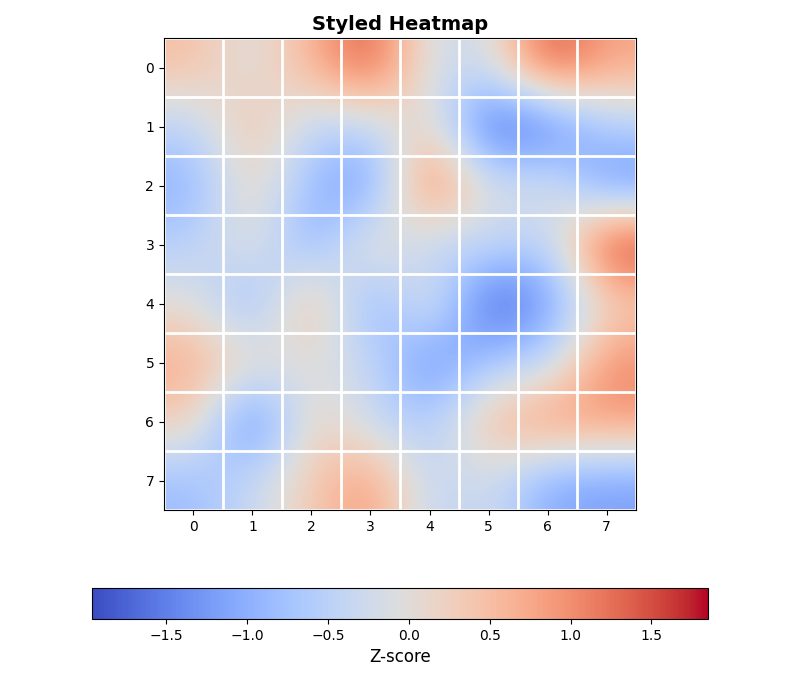

In [8]:
np.random.seed(42)
data = np.random.randn(8, 8)

fig, ax = plt.subplots(figsize=(8, 7))
im = ax.imshow(data, cmap='coolwarm', interpolation='bicubic')
cbar = fig.colorbar(im, ax=ax, location='bottom', shrink=0.8, pad=0.12)
cbar.set_label('Z-score', fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Grid lines
ax.set_xticks(np.arange(-0.5, 8, 1), minor=True)
ax.set_yticks(np.arange(-0.5, 8, 1), minor=True)
ax.grid(which='minor', color='white', linewidth=2, linestyle='-')
ax.tick_params(which='minor', length=0)

ax.set_title('Styled Heatmap', fontsize=14, fontweight='bold')

# Generated by matplotly v4

# Heatmap (imshow)
_im = ax.images[0]
_im.set_cmap('coolwarm')
_im.set_clim(-1.96, 1.85)
_im.set_interpolation('bicubic')
ax.set_aspect(1.0)

# Colorbar
_cbar = getattr(ax.images[0], 'colorbar', None)
if _cbar is None:
    _cbar = fig.colorbar(ax.images[0], ax=ax)
else:
    _cbar.update_normal(ax.images[0])
_cbar.set_label('Z-score', fontsize=12.0)

# Labels
ax.set_title('Styled Heatmap')

# Limits
ax.set_xlim(-0.5, 7.5)
ax.set_ylim(7.5, -0.5)

# Fonts
ax.title.set_fontsize(14.0)
ax.title.set_fontfamily('sans-serif')
ax.xaxis.label.set_fontsize(10.0)
ax.yaxis.label.set_fontsize(10.0)
ax.title.set_fontweight('bold')
ax.tick_params(labelsize=10.0)
ax.tick_params(direction='out', length=3.5, width=0.8)

# Spines
ax.spines['top'].set_linewidth(0.8)
ax.spines['right'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)
ax.spines['left'].set_linewidth(0.8)

# Layout
fig.set_size_inches(8.0, 7.0)
fig.tight_layout()

In [9]:

# Heatmap (imshow)
_im = ax.images[0]
_im.set_cmap('coolwarm')
_im.set_clim(-1.96, 1.85)
_im.set_interpolation('bicubic')
ax.set_aspect(1.0)

# Colorbar
_cbar = getattr(ax.images[0], 'colorbar', None)
if _cbar is None:
    _cbar = fig.colorbar(ax.images[0], ax=ax)
else:
    _cbar.update_normal(ax.images[0])
_cbar.set_label('Z-score', fontsize=12.0)

# Labels
ax.set_title('Styled Heatmap')

# Limits
ax.set_xlim(-0.5, 7.5)
ax.set_ylim(7.5, -0.5)

# Fonts
ax.title.set_fontsize(14.0)
ax.title.set_fontfamily('sans-serif')
ax.xaxis.label.set_fontsize(10.0)
ax.yaxis.label.set_fontsize(10.0)
ax.title.set_fontweight('bold')
ax.tick_params(labelsize=10.0)
ax.tick_params(direction='out', length=3.5, width=0.8)

# Spines
ax.spines['top'].set_linewidth(0.8)
ax.spines['right'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)
ax.spines['left'].set_linewidth(0.8)

# Layout
fig.set_size_inches(8.0, 7.0)
fig.tight_layout()